# Assessment of in-batch similarity variability based on Twin Network developmental stage prediction

This notebook uses Twin Network predictions of developmental stages for a batch with multiple embryos to assess variability of predicted developmental stages beween individual test embryos.

# Table of Contents
* [General](#first-bullet)
* [Load paths](#second-bullet)
* [Load model](#third-bullet)
* [Calculate embeddings](#fourth-bullet)
* [Calculate similarities](#fifth-bullet)
* [(Optional) Save embeddings and similarities](#sixth-bullet)
* [Plot distribution of predicted developmental stages](#seventh-bullet)

## General <a class="anchor" id="first-bullet"></a>

General imports and class definitions

In [1]:
%load_ext autoreload
%autoreload 2

Specify a working directory

In [2]:
dir_root = f"/TwinNet/Scripts/"

Import Python packages

In [3]:
import glob
import matplotlib as mpl
import numpy as np
import pandas as pd
import sys

sys.path.append(dir_root)
from twinnet_tools.tngeneral import TNToolsGeneral
from twinnet_tools.tninference import TNToolsEmbeddings
from twinnet_tools.tninference import TNToolsPaths
from twinnet_tools.tninference import TNToolsSimilarities
from twinnet_tools.tnmodel import TNToolsNetwork
from twinnet_tools.tnplot import TNToolsPlot

Prepare class instances

In [4]:
tools_general = TNToolsGeneral()
tools_embeddings = TNToolsEmbeddings(size_img=224, size_img_min=300)
tools_model = TNToolsNetwork()
tools_paths = TNToolsPaths()
tools_similarities = TNToolsSimilarities()
tools_plot = TNToolsPlot()

Adjust matplotlib parameters to save plots as .svg files.

In [5]:
new_rc_params = {'text.usetex': False,
                'svg.fonttype': 'none'}
mpl.rcParams.update(new_rc_params)

## Load paths <a class="anchor" id="second-bullet"></a>

Load test data paths

In [6]:
path_src_data_test_json = './src_data_test/test_embryos_sorted.json'
embryos_normal = sorted(tools_general.fn_json_load(path_src_data_test_json)['normal_bright_complete'])

Load paths of images sorted by image indices

In [11]:
images_embryos = tools_paths.dirs_to_images_sort_indices(embryos_normal)

[INFO] Number of timepoints/images: 360/20        


Specifiy directory to save output files to

In [12]:
path_dst = "./outputs/"

In [13]:
dir_dst_embeddings = f"{path_dst}/embeddings"
dir_dst_similarities = f"{path_dst}/similarities"

Specify path to embedding model weights

In [15]:
path_model_weights = f"{dir_root}/twinnet_models/model_weights_zebrafish/model_trained_more_data/"

## Load model <a class="anchor" id="third-bullet"></a>

In [16]:
tn_model_embedding = tools_model.tn_embedding_make()
tn_model_embedding.load_weights(path_model_weights)

## Calculate embeddings <a class="anchor" id="fourth-bullet"></a>

Calculate embeddings for all images at each index.

In [17]:
embeddings = dict()
for _k_tp, _v_tp in images_embryos.items():
    print(f'Tp {_k_tp}/{len(images_embryos.keys())}'.ljust(50))
    embeddings[_k_tp] = tools_embeddings.list_to_embeddings_keep_order(
        images_embryos[_k_tp], tn_model_embedding)

Tp 0/360                                          
[DONE][Embeddings] 0001/0001                      
Tp 1/360                                          
[DONE][Embeddings] 0001/0001                      
Tp 2/360                                          
[DONE][Embeddings] 0001/0001                      
Tp 3/360                                          
[DONE][Embeddings] 0001/0001                      
Tp 4/360                                          
[DONE][Embeddings] 0001/0001                      
Tp 5/360                                          
[DONE][Embeddings] 0001/0001                      
Tp 6/360                                          
[DONE][Embeddings] 0001/0001                      
Tp 7/360                                          
[DONE][Embeddings] 0001/0001                      
Tp 8/360                                          
[DONE][Embeddings] 0001/0001                      
Tp 9/360                                          
[DONE][Embeddings] 0001/0001   

Tp 81/360                                         
[DONE][Embeddings] 0001/0001                      
Tp 82/360                                         
[DONE][Embeddings] 0001/0001                      
Tp 83/360                                         
[DONE][Embeddings] 0001/0001                      
Tp 84/360                                         
[DONE][Embeddings] 0001/0001                      
Tp 85/360                                         
[DONE][Embeddings] 0001/0001                      
Tp 86/360                                         
[DONE][Embeddings] 0001/0001                      
Tp 87/360                                         
[DONE][Embeddings] 0001/0001                      
Tp 88/360                                         
[DONE][Embeddings] 0001/0001                      
Tp 89/360                                         
[DONE][Embeddings] 0001/0001                      
Tp 90/360                                         
[DONE][Embeddings] 0001/0001   

Tp 162/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 163/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 164/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 165/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 166/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 167/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 168/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 169/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 170/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 171/360                                        
[DONE][Embeddings] 0001/0001   

[DONE][Embeddings] 0001/0001                      
Tp 243/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 244/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 245/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 246/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 247/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 248/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 249/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 250/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 251/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 252/360                     

[DONE][Embeddings] 0001/0001                      
Tp 323/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 324/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 325/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 326/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 327/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 328/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 329/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 330/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 331/360                                        
[DONE][Embeddings] 0001/0001                      
Tp 332/360                     

## Calculate similarities <a class="anchor" id="fifth-bullet"></a>

Calculate similarities between all embeddings for each index of the test time series data.

In [18]:
similarities = dict()
similarities_low = dict()
for _k_tp, _v_tp in embeddings.items():
    print(f'Tp {_k_tp}'.ljust(50))
    sims, sims_low = tools_similarities.cosine_similarities_in_batch(_v_tp)
    similarities[_k_tp] = sims
    similarities_low[_k_tp] = sims_low

Tp 0                                              
Number of combinations/similarities: 190/190      
Tp 1                                              
Number of combinations/similarities: 190/190      
Tp 2                                              
Number of combinations/similarities: 190/190      
Tp 3                                              
Number of combinations/similarities: 190/190      
Tp 4                                              
Number of combinations/similarities: 190/190      
Tp 5                                              
Number of combinations/similarities: 190/190      
Tp 6                                              
Number of combinations/similarities: 190/190      
Tp 7                                              
Number of combinations/similarities: 190/190      
Tp 8                                              
Number of combinations/similarities: 190/190      
Tp 9                                              
Number of combinations/similari

Number of combinations/similarities: 190/190      
Tp 161                                            
Number of combinations/similarities: 190/190      
Tp 162                                            
Number of combinations/similarities: 190/190      
Tp 163                                            
Number of combinations/similarities: 190/190      
Tp 164                                            
Number of combinations/similarities: 190/190      
Tp 165                                            
Number of combinations/similarities: 190/190      
Tp 166                                            
Number of combinations/similarities: 190/190      
Tp 167                                            
Number of combinations/similarities: 190/190      
Tp 168                                            
Number of combinations/similarities: 190/190      
Tp 169                                            
Number of combinations/similarities: 190/190      
Tp 170                         

Number of combinations/similarities: 190/190      
Tp 244                                            
Number of combinations/similarities: 190/190      
Tp 245                                            
Number of combinations/similarities: 190/190      
Tp 246                                            
Number of combinations/similarities: 190/190      
Tp 247                                            
Number of combinations/similarities: 190/190      
Tp 248                                            
Number of combinations/similarities: 190/190      
Tp 249                                            
Number of combinations/similarities: 190/190      
Tp 250                                            
Number of combinations/similarities: 190/190      
Tp 251                                            
Number of combinations/similarities: 190/190      
Tp 252                                            
Number of combinations/similarities: 190/190      
Tp 253                         

Number of combinations/similarities: 190/190      
Tp 324                                            
Number of combinations/similarities: 190/190      
Tp 325                                            
Number of combinations/similarities: 190/190      
Tp 326                                            
Number of combinations/similarities: 190/190      
Tp 327                                            
Number of combinations/similarities: 190/190      
Tp 328                                            
Number of combinations/similarities: 190/190      
Tp 329                                            
Number of combinations/similarities: 190/190      
Tp 330                                            
Number of combinations/similarities: 190/190      
Tp 331                                            
Number of combinations/similarities: 190/190      
Tp 332                                            
Number of combinations/similarities: 190/190      
Tp 333                         

## (Optional) Save embeddings and similarities <a class="anchor" id="sixth-bullet"></a>

In order to save the embeddings to a JSON file, we have to make content serializable.

Save embeddings

In [19]:
# Make embeddings serializable
embeddings_savable = {
    _k_tp: {
        _k_emb: _v_emb.tolist()
    for _k_emb, _v_emb
    in _v_tp.items()
    }
    for _k_tp, _v_tp
    in embeddings.items()
}

# Save embeddings
for _k_tp, _v_tp in embeddings_savable.items():
    print(f"{_k_tp + 1}".zfill(4), end='\r')
    tools_general.fn_json_write(_v_tp, f"{dir_dst_embeddings}/embeddings_tp{str(_k_tp + 1).zfill(4)}.json")
    
print(f"Saved embeddings to {dir_dst_embeddings}")

Saved embeddings to ./outputs//embeddings


Save similarities

In [20]:
# The similarities dictionary already has lists as values,
# however, lists are with floats and not JSON serializable.
# Therefore, convert each list of similarities to a numpy
# array and back to a list.
similarities_savable = {
    _k_tp: np.array(_v_tp).tolist()
    for _k_tp, _v_tp
    in similarities.items()
}

# Save similarities
for _k_tp, _v_tp in similarities_savable.items():
    print(f"{_k_tp + 1}".zfill(4), end='\r')
    tools_general.fn_json_write(_v_tp, f"{dir_dst_similarities}/similarities_tp{str(_k_tp + 1).zfill(4)}.json")

print(f"Saved similarities to {dir_dst_similarities}")

Saved similarities to ./outputs//similarities


Load similarities

In [21]:
paths_similarities = list(sorted(glob.glob(
    f"{dir_dst_similarities}/similarities_tp*.json")))
similarities_loaded = dict()

for i in range(len(paths_similarities)):
    print(f"{i + 1}".zfill(4), end='\r')
    content = tools_general.fn_json_load(paths_similarities[i])
    similarities_loaded[i] = content
    
print(f"Loaded from {dir_dst_similarities}")

Loaded from ./outputs//similarities


## Plot distribution of predicted developmental stages<a class="anchor" id="seventh-bullet"></a>

Plot distributions of similarities as histograms. As parameters, give similarities with corresponding colors and labels for plotting.

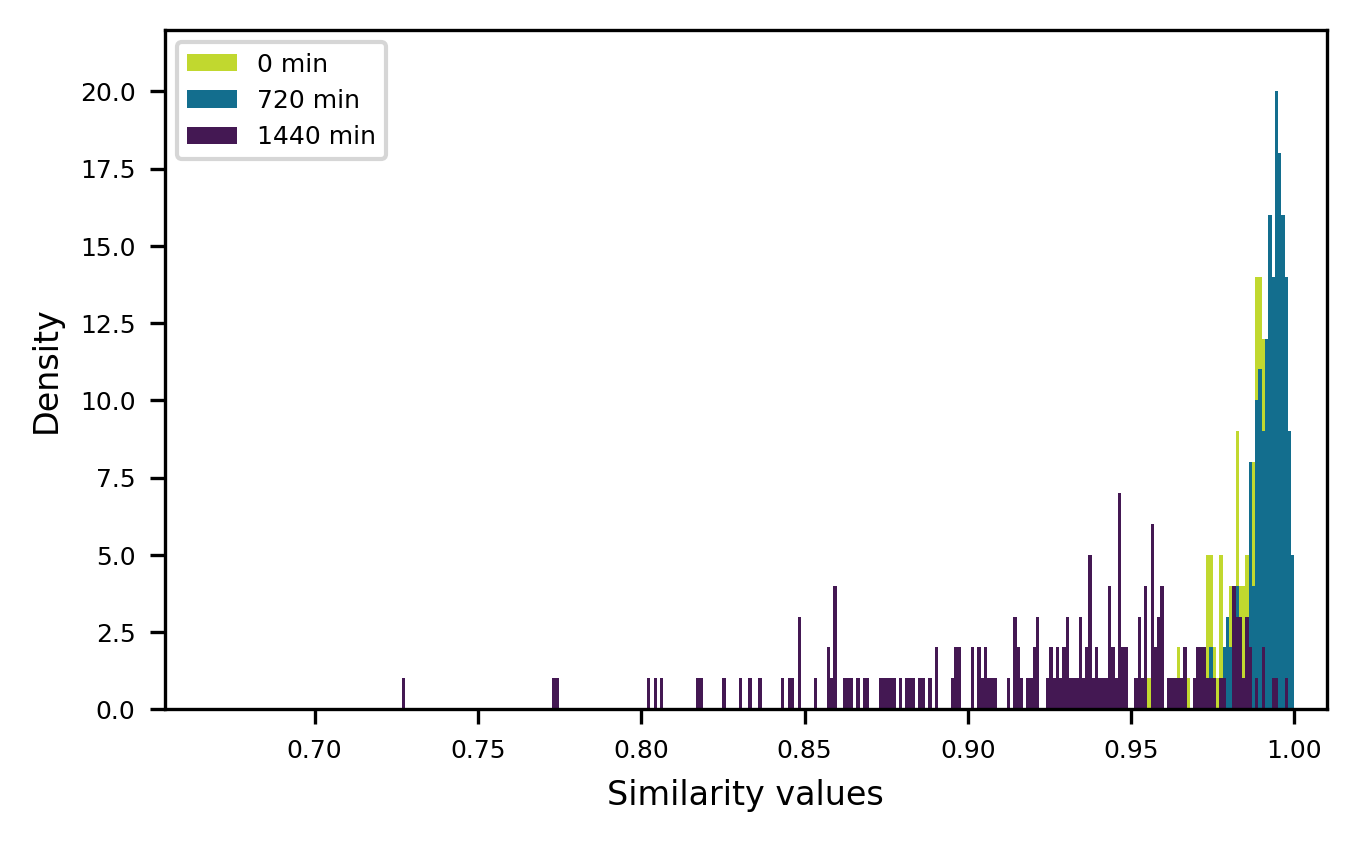

In [28]:
tools_plot.plot_distribution_similarities(
    [similarities[0], similarities[179], similarities[359]],
    [(193/255, 216/255, 47/255), (19/255, 110/255, 142/255), (68/255, 24/255, 83/255)],
    ['0 min', '720 min', '1440 min'],
    path_save=f'{path_dst}/demo_distributions_similarities.svg')